# Import The necessary Libraries

In [3]:
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image
from keras.applications import imagenet_utils, vgg16
from keras.optimizers import Adam, SGD
from keras.metrics import categorical_crossentropy
from keras.layers import Dense, Flatten, Dropout, BatchNormalization
from keras.models import Model
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt
import os
import PIL
from PIL import Image
from shutil import copyfile
import math
import random
%matplotlib inline

In [9]:
os.getcwd()

'C:\\Users\\Mucahit BAYAR\\Document\\Deep Learning\\Transfer_Learning\\Sign Language'

# Data Preprocessing

### We have Raw data Firstly, We dont'need to resize because of All images have same size but then Dividing into train, test, validation.

In [37]:
base_dir = r"Dataset/Dataset"
os.listdir(base_dir)

for file in os.listdir(base_dir):
    data_img = base_dir+"/"+file
    #img = Image.open(data_img)
    #print(img)

### Dividing 

In [38]:
for i in range(0,10):
    print("{} ---> {}".format(i,len(os.listdir(base_dir+'/'+str(i)+'/')))) 

0 ---> 205
1 ---> 206
2 ---> 206
3 ---> 206
4 ---> 207
5 ---> 207
6 ---> 207
7 ---> 206
8 ---> 208
9 ---> 204


In [39]:
print(os.listdir(base_dir)) # Title Of DataSet

['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']


In [40]:
classes = os.listdir(base_dir) # Passing Titles To Variables Named Classes
print(classes)

['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']


In [44]:
source_path = [f'C:/Users/Mucahit BAYAR/Document/Deep Learning/Transfer_Learning/Sign Language/DataSet/Dataset/{a}' for a in classes] # Assigning List That Folder OF within Dataset to Array . 
print(source_path)

['C:/Users/Mucahit BAYAR/Document/Deep Learning/Transfer_Learning/Sign Language/DataSet/Dataset/0', 'C:/Users/Mucahit BAYAR/Document/Deep Learning/Transfer_Learning/Sign Language/DataSet/Dataset/1', 'C:/Users/Mucahit BAYAR/Document/Deep Learning/Transfer_Learning/Sign Language/DataSet/Dataset/2', 'C:/Users/Mucahit BAYAR/Document/Deep Learning/Transfer_Learning/Sign Language/DataSet/Dataset/3', 'C:/Users/Mucahit BAYAR/Document/Deep Learning/Transfer_Learning/Sign Language/DataSet/Dataset/4', 'C:/Users/Mucahit BAYAR/Document/Deep Learning/Transfer_Learning/Sign Language/DataSet/Dataset/5', 'C:/Users/Mucahit BAYAR/Document/Deep Learning/Transfer_Learning/Sign Language/DataSet/Dataset/6', 'C:/Users/Mucahit BAYAR/Document/Deep Learning/Transfer_Learning/Sign Language/DataSet/Dataset/7', 'C:/Users/Mucahit BAYAR/Document/Deep Learning/Transfer_Learning/Sign Language/DataSet/Dataset/8', 'C:/Users/Mucahit BAYAR/Document/Deep Learning/Transfer_Learning/Sign Language/DataSet/Dataset/9']


In [45]:
classes_dir=[f'{a}_dir' for a in classes] # We got two folders such as Dog and Cat, In this snippet we have maden name of file.
classes_dir

['0_dir',
 '1_dir',
 '2_dir',
 '3_dir',
 '4_dir',
 '5_dir',
 '6_dir',
 '7_dir',
 '8_dir',
 '9_dir']

In [46]:
for cl_dir, cl_path in zip(classes_dir, source_path): # Viewing length of files within DataSet
    print(cl_dir,': ',len(os.listdir(cl_path)))

0_dir :  205
1_dir :  206
2_dir :  206
3_dir :  206
4_dir :  207
5_dir :  207
6_dir :  207
7_dir :  206
8_dir :  208
9_dir :  204


In [48]:
# Creating-Folder
try:
    os.mkdir('C:/Users/Mucahit BAYAR/Document/Deep Learning/Transfer_Learning/Sign Language/DataSet/training')
    os.mkdir('C:/Users/Mucahit BAYAR/Document/Deep Learning/Transfer_Learning/Sign Language/DataSet/validation')
    os.mkdir('C:/Users/Mucahit BAYAR/Document/Deep Learning/Transfer_Learning/Sign Language/DataSet/testing')
except OSError:
    pass

In [49]:
TRAINING_PATH= 'C:/Users/Mucahit BAYAR/Document/Deep Learning/Transfer_Learning/Sign Language/DataSet/training' # Path Of Training folder
VALIDATION_PATH= 'C:/Users/Mucahit BAYAR/Document/Deep Learning/Transfer_Learning/Sign Language/DataSet/validation' # Path Of Validating Folder
training_dir_path=[f'C:/Users/Mucahit BAYAR/Document/Deep Learning/Transfer_Learning/Sign Language/DataSet/training/{a}' for a in classes] # Opened Folders up with in training folder such as Dog And Cat.
print('\n',training_dir_path)
validation_dir_path=[f'C:/Users/Mucahit BAYAR/Document/Deep Learning/Transfer_Learning/Sign Language/DataSet/validation/{a}' for a in classes] # Opened Folders up with in validating folder such as Dog And Cat.
print('\n',validation_dir_path)
testing_dir_path=[f'C:/Users/Mucahit BAYAR/Document/Deep Learning/Transfer_Learning/Sign Language/DataSet//testing/{a}' for a in classes] # Opened Folders up with in testing folder such as Dog And Cat.
print('\n',testing_dir_path)


 ['C:/Users/Mucahit BAYAR/Document/Deep Learning/Transfer_Learning/Sign Language/DataSet/training/0', 'C:/Users/Mucahit BAYAR/Document/Deep Learning/Transfer_Learning/Sign Language/DataSet/training/1', 'C:/Users/Mucahit BAYAR/Document/Deep Learning/Transfer_Learning/Sign Language/DataSet/training/2', 'C:/Users/Mucahit BAYAR/Document/Deep Learning/Transfer_Learning/Sign Language/DataSet/training/3', 'C:/Users/Mucahit BAYAR/Document/Deep Learning/Transfer_Learning/Sign Language/DataSet/training/4', 'C:/Users/Mucahit BAYAR/Document/Deep Learning/Transfer_Learning/Sign Language/DataSet/training/5', 'C:/Users/Mucahit BAYAR/Document/Deep Learning/Transfer_Learning/Sign Language/DataSet/training/6', 'C:/Users/Mucahit BAYAR/Document/Deep Learning/Transfer_Learning/Sign Language/DataSet/training/7', 'C:/Users/Mucahit BAYAR/Document/Deep Learning/Transfer_Learning/Sign Language/DataSet/training/8', 'C:/Users/Mucahit BAYAR/Document/Deep Learning/Transfer_Learning/Sign Language/DataSet/training/9

In [50]:
# Train Folder
for train_dir_path in training_dir_path:
    try:
        os.mkdir(train_dir_path)
    except OSError:
        pass

In [53]:
# Validation Folder
for val_dir_path in validation_dir_path:
    try:
        os.mkdir(val_dir_path)
    except OSError:
        pass

In [54]:
# Test Folder
for test_dir_path in testing_dir_path:
    try:
        os.mkdir(test_dir_path)
    except OSError:
        pass

In [55]:
def split_data(SOURCE, TRAINING, VALIDATION, TESTING, SPLIT_SIZE): # We got four variables to any processing.
    files = []
    print('Split Data')
    for filename in os.listdir(SOURCE):# traveling within Source folder.
        file = SOURCE + '/'+ filename # Adding any  folder that what that has Current name.
        if os.path.getsize(file) > 0: # If File has size is greater than zero
            files.append(filename) # adding folder to  within the another folder
        else: # Size equal zero
            print(filename + "is zero length, so ignoring.")
            
    training_length = int( len(files)* SPLIT_SIZE) # Adjusting length Of training dataset
    validation_length = int(len(files) * 0.10) # Adjusting length Of validation dataset
    testing_length = int(len(files) - training_length - validation_length) #Adjusting length Of training dataset
    
    # Viewing
    print('SOURCE: ', SOURCE, '\n TRAINING', TRAINING, '\n VALIDATION',VALIDATION, '\n ',len(files))
    print('training_lenght:', training_length)
    print('validation_length:',validation_length)
    print('testing_length: ',testing_length)
    
    #Assignin Size Processing
    shuffled_Set = random.sample(files, len(files))
    training_set = shuffled_Set[0:training_length]
    validation_set = shuffled_Set[training_length:(training_length+validation_length)]
    testing_set = shuffled_Set[:testing_length]
    
    print(len(training_set))
    print(len(validation_set))
    print(len(testing_set))
    
    # Set Data to Relatively Folder
    for filename in training_set:
        this_file = SOURCE + '/'+ filename
        destination = TRAINING +'/'+ filename
        copyfile(this_file, destination)
        
    for filename in validation_set:
        this_file= SOURCE +'/'+ filename
        destination = VALIDATION+'/'+filename
        copyfile(this_file, destination)
    for filename in testing_set:
        this_file = source +'/'+ filename
        destination = TESTING + '/' + filename
        copyfile(this_file, destination)

In [58]:
split_size = .85 # Ratio Of Split Size
for source, train_dir_path, val_dir_path, test_dir_path in zip(source_path,training_dir_path, validation_dir_path, testing_dir_path): # Rooting within folder
    split_data(source, train_dir_path,val_dir_path, test_dir_path, split_size) # Starting function by Assigning Variables
    print('Splitting \n')

Split Data
SOURCE:  C:/Users/Mucahit BAYAR/Document/Deep Learning/Transfer_Learning/Sign Language/DataSet/Dataset/0 
 TRAINING C:/Users/Mucahit BAYAR/Document/Deep Learning/Transfer_Learning/Sign Language/DataSet/training/0 
 VALIDATION C:/Users/Mucahit BAYAR/Document/Deep Learning/Transfer_Learning/Sign Language/DataSet/validation/0 
  205
training_lenght: 174
validation_length: 20
testing_length:  11
174
20
11
Splitting 

Split Data
SOURCE:  C:/Users/Mucahit BAYAR/Document/Deep Learning/Transfer_Learning/Sign Language/DataSet/Dataset/1 
 TRAINING C:/Users/Mucahit BAYAR/Document/Deep Learning/Transfer_Learning/Sign Language/DataSet/training/1 
 VALIDATION C:/Users/Mucahit BAYAR/Document/Deep Learning/Transfer_Learning/Sign Language/DataSet/validation/1 
  206
training_lenght: 175
validation_length: 20
testing_length:  11
175
20
11
Splitting 

Split Data
SOURCE:  C:/Users/Mucahit BAYAR/Document/Deep Learning/Transfer_Learning/Sign Language/DataSet/Dataset/2 
 TRAINING C:/Users/Mucahit 

# Datas Paths

In [5]:
train_path = "Dataset/training"
test_path = "Dataset/testing"
validation_path = "Dataset/validation"

In [6]:
train_batches = ImageDataGenerator().flow_from_directory(train_path,
                                                        target_size=(224, 224),
                                                        batch_size= 10)

Found 1748 images belonging to 10 classes.


In [8]:
valid_batches = ImageDataGenerator().flow_from_directory(validation_path,
                                                        target_size=(224,224),
                                                        batch_size=30)

Found 200 images belonging to 10 classes.


In [9]:
test_batches = ImageDataGenerator().flow_from_directory(test_path,
                                                       target_size=(224,224),
                                                       shuffle=False)

Found 114 images belonging to 10 classes.


# Model

In [10]:
base_model = vgg16.VGG16(weights = "imagenet", include_top = False, input_shape = (224, 224, 3), pooling = 'avg')

In [11]:
for layer in base_model.layers[:-5]:
    layer.trainable = False

In [12]:
base_model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

# Build New Model

In [14]:
last_output = base_model.output

x = Dense(10, activation='softmax', name='softmax')(last_output)
new_model = Model(inputs=base_model.input, outputs=x)
new_model.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)      

In [18]:
new_model.compile(Adam(lr=0.0001), loss= 'categorical_crossentropy', metrics=['accuracy'])

In [19]:
from keras.callbacks import ModelCheckpoint

checkpoint = ModelCheckpoint(filepath='signlanguage.model.hdf5', save_best_only = True)

In [21]:
history = new_model.fit_generator(train_batches, 
                                  steps_per_epoch=18, 
                                  validation_data= valid_batches, 
                                  validation_steps=3, 
                                  epochs=20, 
                                  verbose=1, 
                                  callbacks=[checkpoint])

Epoch 1/20
18/18 [==============================] - 29s 2s/step - loss: 3.9373 - accuracy: 0.1833 - val_loss: 2.0954 - val_accuracy: 0.2667
Epoch 2/20
18/18 [==============================] - 28s 2s/step - loss: 1.8190 - accuracy: 0.3389 - val_loss: 1.7065 - val_accuracy: 0.3667
Epoch 3/20
18/18 [==============================] - 28s 2s/step - loss: 1.4823 - accuracy: 0.4722 - val_loss: 1.4753 - val_accuracy: 0.5333
Epoch 4/20
18/18 [==============================] - 29s 2s/step - loss: 1.0834 - accuracy: 0.6444 - val_loss: 0.8985 - val_accuracy: 0.7444
Epoch 5/20
18/18 [==============================] - 30s 2s/step - loss: 0.8038 - accuracy: 0.7111 - val_loss: 0.8698 - val_accuracy: 0.6667
Epoch 6/20
18/18 [==============================] - 29s 2s/step - loss: 0.6561 - accuracy: 0.7667 - val_loss: 0.4732 - val_accuracy: 0.8667
Epoch 7/20
18/18 [==============================] - 28s 2s/step - loss: 0.4110 - accuracy: 0.8722 - val_loss: 0.3868 - val_accuracy: 0.8333
Epoch 8/20
18/18 [==

# Evaluate DataSet

In [26]:
from sklearn.datasets import load_files
from keras.utils import np_utils
import numpy as np

# This function's task is divide test data set into files and targets.
def load_dataset(path):
    data = load_files(path)
    paths = np.array(data['filenames'])
    targets= np_utils.to_categorical(np.array(data['target']))
    return paths, targets

test_files, test_targets = load_dataset(test_path)

In [27]:
from keras.preprocessing import image
from keras.applications.vgg16 import preprocess_input
from tqdm import tqdm

In [28]:
# This function's task is convert from image to array.
def path_to_tensor(img_path):
    img = image.load_img(img_path, target_size=(224, 224))
    x = image.img_to_array(img)
    return np.expand_dims(x, axis=0) # Expanding Dimension

In [29]:
# This function's task is make list image as array.
def paths_to_tensor(img_paths):
    list_of_tensors = [path_to_tensor(img_path) for img_path in tqdm(img_paths)] # tqdm is show loading that how is Processing forward as visual
    return np.vstack(list_of_tensors) # concatenation Array

In [30]:
test_tensors = preprocess_input(paths_to_tensor(test_files))

100%|██████████| 114/114 [00:00<00:00, 431.98it/s]


In [31]:
print('\nTesting loss: {:.4f}\nTesting accuracy: {:.4f}'.format(*new_model.evaluate(test_tensors, test_targets)))

4/4 [==============================] - 7s 2s/step - loss: 0.1365 - accuracy: 0.9737

Testing loss: 0.1365
Testing accuracy: 0.9737


# How Model Performed

In [32]:
from sklearn.metrics import confusion_matrix

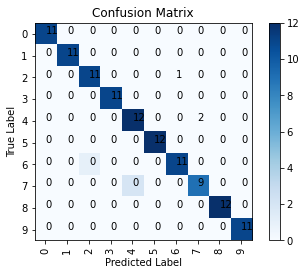

In [35]:
cm_labels = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

cm = confusion_matrix(np.argmax(test_targets, axis=1),
                     np.argmax(new_model.predict(test_tensors), axis=1))

plt.imshow(cm, cmap= plt.cm.Blues)
plt.colorbar()
indexes = np.arange(len(cm_labels))

for i in indexes:
    for j in indexes:
        plt.text(j, i, cm[j,i])
plt.xticks(indexes, cm_labels, rotation= 90)
plt.xlabel('Predicted Label')
plt.yticks(indexes, cm_labels)
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()